## Load imports and datasets

In [1]:
# Runs all imports
import pandas as pd
import datetime
from datetime import timedelta
import numpy as np

# Displays all datasets' columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Log into Darwin SDK
#from amb_sdk.sdk import DarwinSdk
#s = DarwinSdk()
#s.set_url('https://amb-demo-api.sparkcognition.com/v1/')
#s.auth_login_user('ethan.freeburg@utexas.edu','AAn7WQfgqk')
%matplotlib inline

## Load Main Dataset

In [2]:
# Creates a table from compressed csvs in a directory
import os

DIR = 'data_details'

os.chdir(DIR)

tables = []
for file in os.listdir():
    tables.append(pd.read_csv(file, compression='gzip'))

os.chdir('../')

raw = pd.concat(tables)
    
raw.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,200802,22,1300,200802,22,2200,14216,79884,NEW HAMPSHIRE,33,2008,February,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,22-FEB-08 13:00:00,EST-5,22-FEB-08 22:00:00,0,0,0,0,0.00K,0.00K,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A noreaster moved up the coast southeast of Ca...,NaN,CSV
1,200804,1,352,200804,1,352,15549,88334,NEW HAMPSHIRE,33,2008,April,High Wind,Z,12,EASTERN HILLSBOROUGH,BOX,01-APR-08 03:52:00,EST-5,01-APR-08 03:52:00,0,0,0,0,0.00K,0.00K,Amateur Radio,52.0,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong southwest flow behind a warm front allo...,An amateur radio operator recorded a wind gust...,CSV
2,200803,1,0,200803,1,1320,14773,83820,NEW HAMPSHIRE,33,2008,March,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,01-MAR-08 00:00:00,EST-5,01-MAR-08 13:20:00,0,0,0,0,0.00K,0.00K,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure tracked from the Great Lakes acro...,NaN,CSV
3,200801,14,500,200801,14,1700,13559,75727,NEW HAMPSHIRE,33,2008,January,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,14-JAN-08 05:00:00,EST-5,14-JAN-08 17:00:00,0,0,0,0,10.00K,0.00K,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure moved up the Atlantic coast and s...,NaN,CSV
4,200812,19,1353,200812,21,200,25148,146588,NEW HAMPSHIRE,33,2008,December,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,19-DEC-08 13:53:00,EST-5,21-DEC-08 02:00:00,0,0,0,0,0.00K,0.00K,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An intensifying coastal low spread heavy snow ...,Six to eight inches of snow fell across easter...,CSV


## Reformat Data

In [3]:
data = raw.copy()

# --------------------- CLEANING ---------------------
# split and BEGIN_YEARMONTH + END_YEARMONTH columns into 2 columns each --> YEAR + MONTH
begin_year = data['BEGIN_YEARMONTH'].astype(str).str[:4]
begin_month = data['BEGIN_YEARMONTH'].astype(str).str[4:]
data['BEGIN_YEAR'] = begin_year
data['BEGIN_MONTH'] = begin_month
#data.drop(columns=['BEGIN_YEARMONTH'], inplace=True)

end_year = data['END_YEARMONTH'].astype(str).str[:4]
end_month = data['END_YEARMONTH'].astype(str).str[4:]
data['END_YEAR'] = end_year
data['END_MONTH'] = end_month
#data.drop(columns=['END_YEARMONTH'], inplace=True)

# add begin and end dates and times in YYYY-MM-DD HH:MM:SS format
begin = data['BEGIN_YEAR'].map(str) + '-' + data['BEGIN_MONTH'].map(str) + '-' + data['BEGIN_DAY'].map(str) + ' '
hour = data['BEGIN_TIME'].astype(str).str[:-2]
hour = hour.apply(lambda x: '{0:0>2}'.format(x))
minute = data['BEGIN_TIME'].astype(str).str[-2:]
minute = minute.apply(lambda x: '{0:0>2}'.format(x))
time = hour.map(str) + ':' + minute.map(str) + ':00'
data['BEGIN'] = begin+time

end = data['END_YEAR'].map(str) + '-' + data['END_MONTH'].map(str) + '-' + data['END_DAY'].map(str) + ' '
e_hour = data['END_TIME'].astype(str).str[:-2]
e_hour = e_hour.apply(lambda x: '{0:0>2}'.format(x))
e_minute = data['END_TIME'].astype(str).str[-2:]
e_minute = e_minute.apply(lambda x: '{0:0>2}'.format(x))
e_time = e_hour.map(str) + ':' + e_minute.map(str) + ':00'
data['END'] = end+e_time

# Explore Data Components

In [4]:
desc = data.describe(include='all')
desc

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,BEGIN_YEAR,BEGIN_MONTH,END_YEAR,END_MONTH,BEGIN,END
count,683982.000000,683982.000000,683982.000000,683982.000000,683982.000000,683982.000000,683982.000000,683982.000000,683982,683982.000000,683982.000000,683982,683982,683982,683982.000000,683982,683982,683982,683982,683982,683982.000000,683982.000000,683982.000000,683982.000000,568908,565471,683982,365516.000000,235847,69724,277.000000,15134,15134.000000,15134.000000,1903,1903,1903.0000,1903,433481.000000,433481,433481,433481.000000,433481,433481,433481.000000,433481.000000,433481.000000,433481.000000,683982,492890,683982,683982,683982,683982,683982,683982,683982
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,NaN,NaN,12,56,3,NaN,4181,123,354343,9,347741,NaN,NaN,NaN,NaN,1502,455,44,NaN,4,7,NaN,7,NaN,NaN,85,39,NaN,731,NaN,16,42528,NaN,16,42878,NaN,NaN,NaN,NaN,102145,428398,1,11,12,11,12,354343,347741
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TEXAS,NaN,NaN,June,Thunderstorm Wind,C,NaN,WASHINGTON,LWX,01-JUL-12 00:00:00,CST-6,31-JUL-12 23:59:00,NaN,NaN,NaN,NaN,0.00K,0.00K,Trained Spotter,NaN,EG,Heavy Rain,NaN,EF0,NaN,NaN,JAN,AL,NaN,MADISON,NaN,N,SPRINGFIELD,NaN,N,SPRINGFIELD,NaN,NaN,NaN,NaN,A strong upper-level disturbance passed throug...,Wind gusts were estimated at 60 mph.,CSV,2011,06,2011,06,2012-07-1 00:00:00,2012-07-31 23:59:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47599,NaN,NaN,104721,172886,412313,NaN,5422,23416,1163,324875,1107,NaN,NaN,NaN,NaN,404084,551922,125634,NaN,171868,62904,NaN,7901,NaN,NaN,140,192,NaN,22,NaN,104554,483,NaN,96475,465,NaN,NaN,NaN,NaN,294,684,683982,79091,104721,79091,104721,1163,1107
mean,201286.661820,14.923438,1276.620968,201286.661822,16.625633,1465.462794,72095.015774,432003.999851,NaN,32.312742,2012.807284,NaN,NaN,NaN,98.374020,NaN,NaN,NaN,NaN,NaN,0.043320,0.016777,0.008594,0.003300,NaN,NaN,NaN,33.951083,NaN,NaN,1.490975,NaN,3.067298,182.755379,NaN,NaN,103.7299,NaN,2.410599,NaN,NaN,2.444181,NaN,NaN,37.838124,-90.261514,37.835244,-90.254036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,315.112678,9.215241,680.820287,315.112676,9.207156,612.990317,34440.257262,208244.474812,NaN,18.154240,3.151748,NaN,NaN,NaN,122.789436,NaN,NaN,NaN,NaN,NaN,2.577603,3.045148,0.277897,0.135616,NaN,NaN,NaN,25.179454,NaN,NaN,1.048165,NaN,4.246596,287.020573,NaN,NaN,83.1857,NaN,4.446881,NaN,NaN,4.471382,NaN,NaN,5.022057,11.126900,5.022675,11.124569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,200801.000000,1.000000,0.000000,200801.000000,1.000000,0.000000,11748.000000,64592.000000,NaN,1.000000,2008.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,0.010000,1.000000,NaN,NaN,1.0000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,-14.400000,-170.919800,-14.456000,-170.868900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,201007.000000,7.000000,753.000000,201007.000000,9.000000,1100.000000,42904.000000,251659.250000,NaN,19.000000,2010.000000,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.250000,NaN,NaN,1.000000,NaN,0.430000,50.000000,NaN,NaN,47.0000,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,34.602600,-97.140000,34.600000,-97.137700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,201302.000000,15.000000,1452.000000,201302.000000,17.000000,1600.000000,71618.000000,432052.500000,NaN,31.000000,2013.000000,NaN,NaN,NaN,63.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,50.000000,NaN,NaN,

Upstream analysis suggets that several fields do not have sufficient information to perform data analysis upon. The following code block determines which do not meet a predefined threshold of missing values before recommending dropping.

In [5]:
row_count = len(data.index)

threshold = 0.5

analysis = pd.DataFrame(columns=['Field','Missing','Reccomendation'])

for a in desc.columns.values:
    missing = 1 - desc[a]['count'] / row_count
    rec = 'Keep'
    if missing > threshold:
        rec = 'Drop'
    
    analysis = analysis.append({'Field': a,'Missing': missing,'Reccomendation':rec},ignore_index=True)
    
            
analysis

,Field,Missing,Reccomendation
0,BEGIN_YEARMONTH,0.000000,Keep
1,BEGIN_DAY,0.000000,Keep
2,BEGIN_TIME,0.000000,Keep
3,END_YEARMONTH,0.000000,Keep
4,END_DAY,0.000000,Keep
5,END_TIME,0.000000,Keep
6,EPISODE_ID,0.000000,Keep
7,EVENT_ID,0.000000,Keep
8,STATE,0.000000,Keep
9,STATE_FIPS,0.000000,Keep


In [6]:
#drops
drop_list = ["BEGIN_YEARMONTH",
             "END_YEARMONTH",
             "EPISODE_ID",
             "EVENT_ID",
             "STATE_FIPS",
             "BEGIN_DAY",
             "BEGIN_TIME",
             "END_DAY",
             "END_TIME",
             "CATEGORY",
             "CZ_TYPE",
             "CZ_FIPS",             
             "CZ_NAME",
             "TOR_OTHER_WFO",
             "TOR_OTHER_CZ_NAME",
             "TOR_OTHER_CZ_STATE",
             "TOR_OTHER_CZ_FIPS",
             "WFO",
             "END_DATE_TIME",
             "CZ_TIMEZONE",
             "BEGIN_RANGE",
             "BEGIN_AZIMUTH",
             "BEGIN_YEAR",            
             "BEGIN_MONTH",
             "END_YEAR",
             "END_MONTH",
             "BEGIN",
             "END"            
            ]

for col_drop in drop_list:   
    data = data.drop(col_drop, axis = 1)
    

#change DAMAGE_PROPERTY and DAMAGE_CROPS type from #.##K to float
def convertToFloat(x):
    x = str(x)
    if(x[-1]=='K'):
        return(float(x[0:-1])*1000)
    elif(x[-1]=='M'):
        return(float(x[0:-1])*1000000)
    elif(x[-1]=='B'):
        return(float(x[0:-1])*1000000000)
    else:
        return(0.0)

    
#print(pd.value_counts(data.DAMAGE_PROPERTY))
#print(pd.value_counts(data.DAMAGE_CROPS))
data['DAMAGE_PROPERTY'].fillna(0.0, inplace=True)
data['DAMAGE_PROPERTY'] = data['DAMAGE_PROPERTY'].apply(convertToFloat)

data['DAMAGE_CROPS'].fillna(0.0, inplace=True)
data['DAMAGE_CROPS'] = data['DAMAGE_CROPS'].apply(convertToFloat)


#remove the row if no location information is provided
#note this removes 250501 rows, reducing our dataset by 37%
data = data[pd.notnull(data['BEGIN_LOCATION'])]
data = data[pd.notnull(data['END_LOCATION'])]



## Read in More Data

In [7]:
cat_map = pd.read_csv('data_other/analyst_defined_weather_category_map.csv')
cat_map.head()

,Weather Category,Event Type
0,Wind,Thunderstorm Wind
1,Wind,High Wind
2,Wind,Marine Thunderstorm Wind
3,Wind,Marine High Wind
4,Wind,Strong Wind


In [8]:
# Merge data together
data_mapped = data.merge(cat_map,how="left",left_on='EVENT_TYPE',right_on='Event Type')

100000000.0


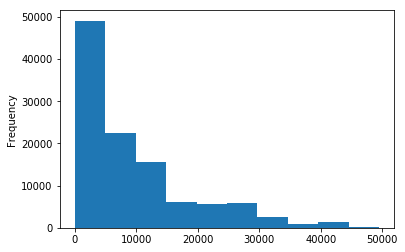

In [26]:
#data['DAMAGE_PROPERTY'].plot.hist()
print(0.01*data['DAMAGE_PROPERTY'].max())
#data_cut = data #data.loc[(data['DAMAGE_PROPERTY'] > 1) & (data['DAMAGE_PROPERTY'] < 25000)]
#data_cut = data.loc[(data['DAMAGE_PROPERTY'] < 1000000)]
data_cut = data.loc[(data['DAMAGE_PROPERTY'] > 1) & (data['DAMAGE_PROPERTY'] < 50000)]
#data_cut = data.loc[(data['DAMAGE_PROPERTY'] > 1) & (data['DAMAGE_PROPERTY'] < 25000)]
data_cut['DAMAGE_PROPERTY'].plot.hist()
#data_mapped.groupby('Weather Category').count()['Event Type']

In [ ]:
# --------------------- FEATURE ENGINEERING ---------------------
# add duration column
duration = pd.to_datetime(data['END']) - pd.to_datetime(data['BEGIN'])
                   
data['DURATION_seconds'] = ((duration.dt.total_seconds()))    

#separates hail size / wind speed MAGNITUDE
data['WIND_SPEED'] = np.where(data['MAGNITUDE_TYPE'].isin(['MG','EG']), data['MAGNITUDE'], np.NaN)
data['HAIL_SIZE'] = np.where(data['MAGNITUDE_TYPE'].isna(), data['MAGNITUDE'], np.NaN)

#divide the data into 12 distinct groups by event type:
pd.value_counts(data.EVENT_TYPE)
"""
Wind (COLE):
    Thunderstorm Wind
    High Wind
    Marine Thunderstorm Wind
    Marine High Wind
    Strong Wind
    Marine Strong Wind

Winter Weather (ETHAN):
    Winter Weather
    Winter Storm
    Heavy Snow
    Blizzard
    Frost/Freeze
    Ice Storm
    Sleet
    Lake-Effect Snow

Rain (FREYA):
    Heavy Rain

Hail (RUOCHEN):
    Hail
    Marine Hail

Flood (FREYA):
    Flash Flood
    Flood
    Coastal Flood
    Lakeshore Flood

Drought (ETHAN):
    Drought

Tornado (COLE):
    Tornado

Heat (ETHAN):
    Heat
    Excessive Heat

Cold (COLE):
    Cold/Wind Chill
    Extreme Cold/Wind Chill

Lightning (FREYA):
    Lightning

Wildfire (RUOCHEN):
    Wildfire

Tides/Currents (RUOCHEN):
    High Surf
    Rip Current
    Astronomical Low Tide
    Storm Surge/Tide
"""
data.columns
data.head(50)

In [11]:
raw.columns.values

array(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE',
       'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE',
       'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE',
       'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY',
       'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE',
       'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH',
       'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype=object)